In [2]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Stock Price Data.csv")
df_submission = pd.read_csv("Sample Submission.csv")

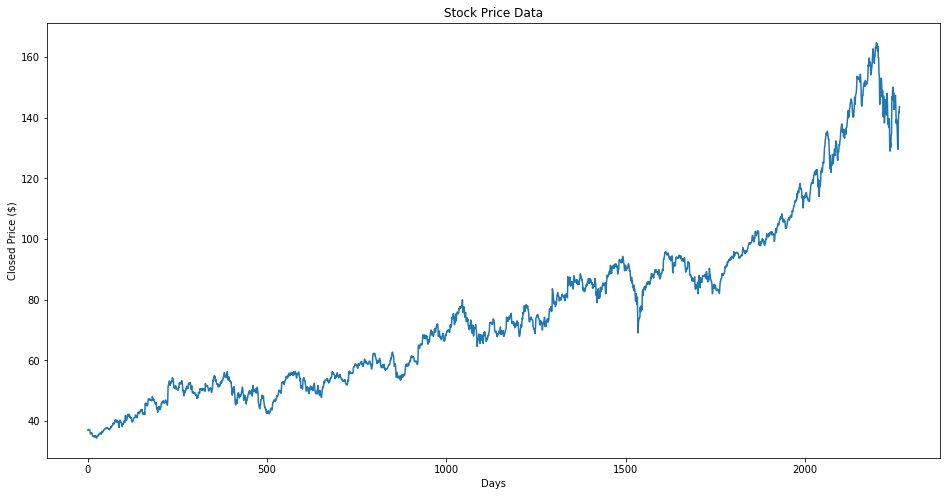

In [4]:
plt.figure(figsize=(16,8))
plt.title('Stock Price Data')
plt.xlabel('Days')
plt.ylabel('Closed Price ($)')
plt.plot(df['Close'])

In [5]:
df.set_index(df["Date"])
df_close = df.filter(["Close"])
split = math.ceil(len(df)*.7)

In [6]:
close = df_close.values
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(close)

In [7]:
train = scaled_data[:split]
test = scaled_data[split:]

In [8]:
x_train = []
y_train = []
for i in range(60, len(train)):
    x_train.append(train[i- 60:i,0])
    y_train.append(train[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


In [10]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [11]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1526/1526 [==============================] - 22s 14ms/step - loss: 7.0843e-04
Epoch 2/5
1526/1526 [==============================] - 22s 14ms/step - loss: 2.9143e-04
Epoch 3/5
1526/1526 [==============================] - 21s 14ms/step - loss: 2.1964e-04
Epoch 4/5
1526/1526 [==============================] - 22s 15ms/step - loss: 1.8777e-04
Epoch 5/5
1526/1526 [==============================] - 21s 14ms/step - loss: 1.5883e-04


In [13]:
test_data = scaled_data[split - 60: , : ]

In [14]:
x_test = []
y_test = close[split: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60 : i, 0])

In [15]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [17]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

3.7733429237149685

/Users/yonglertang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


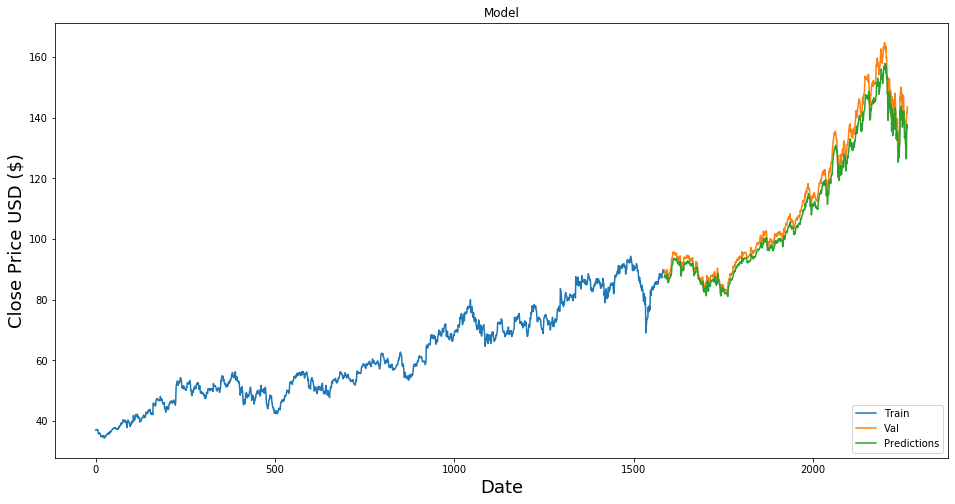

In [18]:
train = df_close[:split]
valid = df_close[split:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [19]:
valid

,Close,Predictions
1586,89.835001,87.388306
1587,89.232003,88.180435
1588,89.259002,87.723801
1589,88.988999,87.741196
1590,88.521002,87.518677
...,...,...
2260,129.597002,127.464302
2261,138.155997,126.454124
2262,142.079997,134.782486
2263,141.611993,137.779800


In [20]:
new_df = df.filter(['Close'])

last_60_days = new_df[-60:].values

for i in range(60, 415):
    last_60_days_scaled = scaler.transform(last_60_days)
    X_test = []
    X_test.append(last_60_days_scaled[i-60:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predict = model.predict(X_test)
    predict_value = scaler.inverse_transform(predict)
    last_60_days = np.append(last_60_days, predict_value)
    last_60_days = np.reshape(last_60_days, (len(last_60_days), 1))

In [21]:
predictedValues = last_60_days[60:len(last_60_days)]
type(predictedValues)

numpy.ndarray

In [22]:
predictedValues

array([[138.62475586],
       [133.37704468],
       [128.87664795],
       [125.10523987],
       [122.04673004],
       [119.56238556],
       [117.4858551 ],
       [115.6714325 ],
       [114.01197052],
       [112.43941498],
       [110.9171524 ],
       [109.43014526],
       [107.97584534],
       [106.55737305],
       [105.17923737],
       [103.84502411],
       [102.55661011],
       [101.31409454],
       [100.11629486],
       [ 98.96120453],
       [ 97.84645081],
       [ 96.7696228 ],
       [ 95.72848511],
       [ 94.72099304],
       [ 93.74538422],
       [ 92.80011749],
       [ 91.88384247],
       [ 90.99533844],
       [ 90.13349915],
       [ 89.29730225],
       [ 88.48577881],
       [ 87.69801331],
       [ 86.93312836],
       [ 86.19029236],
       [ 85.46868134],
       [ 84.76756287],
       [ 84.08618927],
       [ 83.42386627],
       [ 82.779953  ],
       [ 82.15379333],
       [ 81.5447998 ],
       [ 80.95239258],
       [ 80.37602234],
       [ 79

In [23]:
predictedValues = np.hstack(predictedValues)

In [24]:
lst = predictedValues
data2 = df_submission["Date"]
df1= pd.DataFrame({'Date':data2, 'Close':lst})

In [25]:
df1.to_csv('LSTM Model.csv', index=False)